https://machinelearningmastery.com/standard-machine-learning-datasets/

2번 Wine

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
wine_quality = pd.read_csv('http://archive.ics.ine-learning-databasuci.edu/ml/maches/wine-quality/winequality-red.csv',sep=';')

In [ ]:
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- quality 품질
- fixed acidity 산도
- volatile acidity 휘발성산
- citric acid 시트르산
- residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
- chlorides 염화물
- free sulfur dioxide 독립 이산화황
- total sulfur dioxide 총 이산화황
- density 밀도
- pH 수소이온농도
- sulphates 황산염
- alcohol 도수

In [ ]:
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

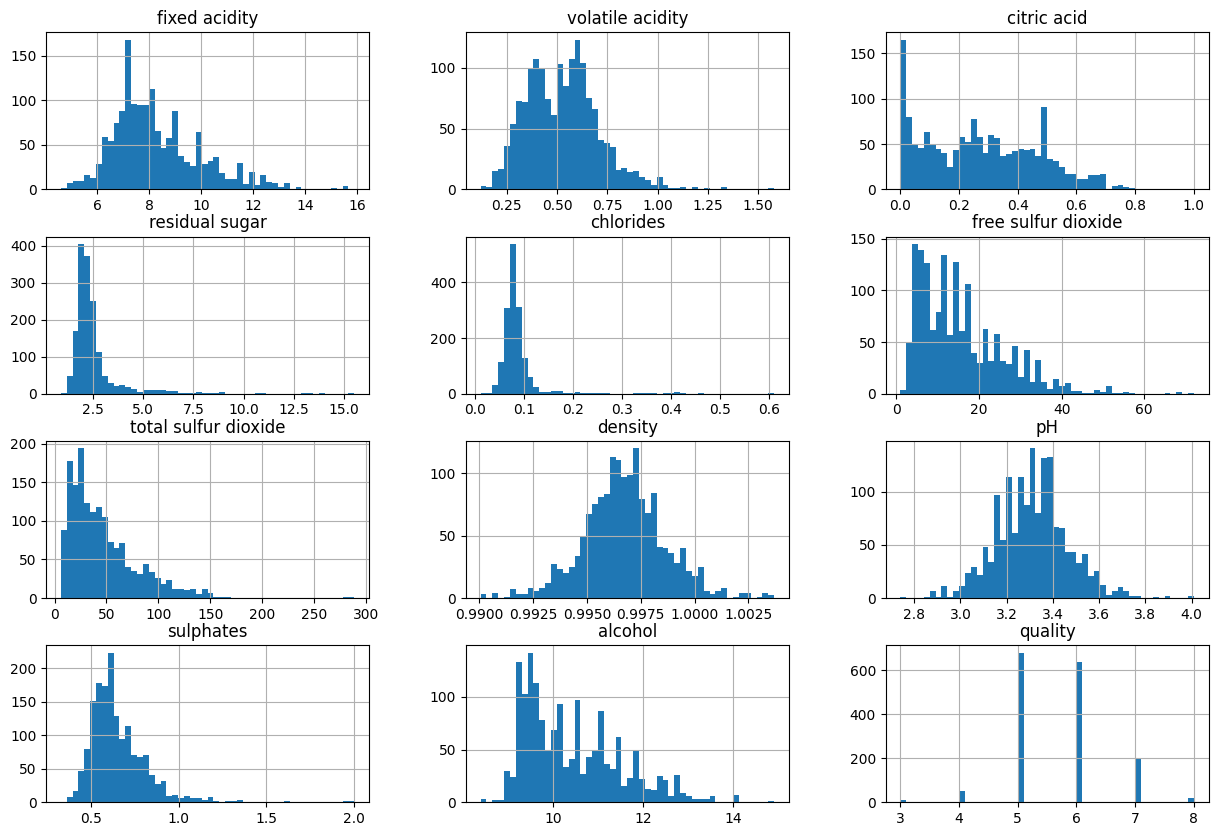

In [ ]:
wine_quality.hist(bins=50,figsize=(15,10))

In [ ]:
wine_quality['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
tf.one_hot(wine_quality['quality'],10)

<tf.Tensor: shape=(1599, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [ ]:
train,test = train_test_split(wine_quality,test_size=0.2)

In [ ]:
x_train = train.drop(columns='quality')
y_train = train.quality
y_train

27      5
968     6
1010    7
1581    5
23      5
       ..
1043    7
365     6
1538    5
787     6
821     7
Name: quality, Length: 1279, dtype: int64

In [ ]:
class Model(tf.keras.Model):
    def __init__(self):
        super(Model,self).__init__()
        initializer = tf.keras.initializers.glorot_uniform()
        self.w1 = tf.Variable(initializer([11, 50]))
        self.b1 = tf.Variable(initializer([50]))
        self.w2 = tf.Variable(initializer([50,100]))
        self.b2 = tf.Variable(initializer([100]))
        self.b3 = tf.Variable(initializer([70]))
        self.w3 = tf.Variable(initializer([100,70]))
        self.b4 = tf.Variable(initializer([40]))
        self.w4 = tf.Variable(initializer([70, 40]))
        self.b5 = tf.Variable(initializer([20]))
        self.w5 = tf.Variable(initializer([40, 20]))
        self.b6 = tf.Variable(initializer([11]))
        self.w6 = tf.Variable(initializer([20,11]))
        self.b7 = tf.Variable(initializer([1]))
        self.w7 = tf.Variable(initializer([11,1]))


    def call(self,inputs): 
        y1 = self.b1 + inputs @ self.w1
        y1 = tf.keras.activations.sigmoid(y1)
        y2 = self.b2 + y1 @ self.w2
        y2 = tf.keras.activations.sigmoid(y2)
        y3 = self.b3 + y2 @ self.w3
        y3 = tf.keras.activations.sigmoid(y3)
        y4 = self.b4 + y3 @ self.w4
        y4 = tf.keras.activations.sigmoid(y4)
        y5 = self.b5 + y4 @ self.w5
        y5 = tf.keras.activations.sigmoid(y5)
        y6 = self.b6 + y5 @ self.w6
        y6 = tf.keras.activations.sigmoid(y6)
        y7 = self.b7 + y6 @ self.w7
        return tf.squeeze(y7)

def loss(target,y):
    return tf.reduce_mean((target-y)**2)

In [ ]:
eta = 0.1
opt = tf.keras.optimizers.SGD(learning_rate=eta)
# loss = tf.keras.losses.MSE
model = Model()
model.compile(optimizer=opt,loss=loss)
history = model.fit(tf.convert_to_tensor(x_train),
          tf.convert_to_tensor(y_train,tf.float64),epochs=300)

Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


40/40 [==============================] - 2s 6ms/step - loss: 23.7554
Epoch 2/1000
40/40 [==============================] - 0s 6ms/step - loss: 23.0056
Epoch 3/1000
40/40 [==============================] - 0s 8ms/step - loss: 22.7166
Epoch 4/1000
40/40 [==============================] - 0s 9ms/step - loss: 22.5700
Epoch 5/1000
40/40 [==============================] - 0s 9ms/step - loss: 22.4826
Epoch 6/1000
40/40 [==============================] - 0s 7ms/step - loss: 22.4249
Epoch 7/1000
40/40 [==============================] - 0s 10ms/step - loss: 22.3842
Epoch 8/1000
40/40 [==============================] - 0s 6ms/step - loss: 22.3540
Epoch 9/1000
40/40 [==============================] - 0s 6ms/step - loss: 22.3308
Epoch 10/1000
40/40 [==============================] - 0s 6ms/step - loss: 22.3123
Epoch 11/1000
40/40 [==============================] - 0s 9ms/step - loss: 22.2974
Epoch 12/1000
40/40 [==============================] - 0s 5ms/step - loss: 22.2850
Epoch 13/1000
40/40 [====

<Axes: >

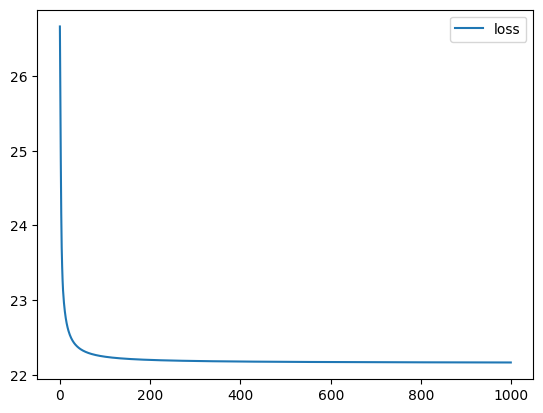

In [ ]:
pd.DataFrame(history.history).plot()